# Multiple Linear Regression Model

In [46]:
# Dependencies and setup
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Imputer
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge
# from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

In [47]:
# Set maximum rows to a high number
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 150)

In [48]:
# Load dataset
training_data = pd.read_csv("02-cleaned_data/cleaned_training.csv",index_col=0)

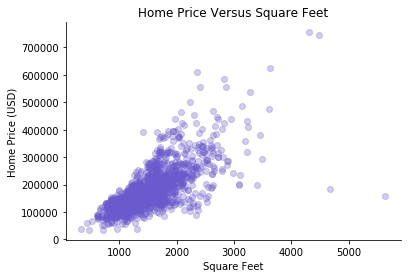

In [49]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(training_data['GrLivArea'],training_data['SalePrice'],color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Home Price (USD)")
plt.grid(False)
sns.despine()

In [50]:
# Drop extreme outliers
training_data.drop(index = training_data[(training_data.GrLivArea>4000) & (training_data.SalePrice<300000)].index.tolist(), inplace=True)

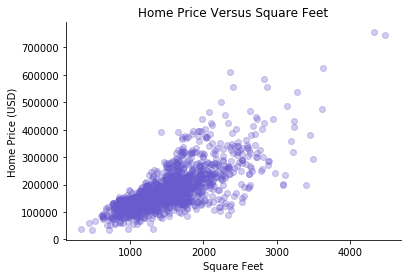

In [51]:
# Show a scatter plot compaing home price and home square feet
plt.scatter(training_data['GrLivArea'],training_data['SalePrice'],color="slateblue",alpha=0.3)
plt.title("Home Price Versus Square Feet")
plt.xlabel("Square Feet")
plt.ylabel("Home Price (USD)")
plt.grid(False)
sns.despine()

In [52]:
training_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [53]:
training_data = training_data[["MSSubClass","LotFrontage","LotArea","MasVnrArea","Neighborhood","OverallQual","OverallCond","YearBuilt","ExterQual","BsmtQual","BsmtCond","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageCars","GarageArea","GarageQual","GarageCond","PoolQC","YrSold","SaleCondition","SalePrice"]]

In [54]:
training_data.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,BsmtQual,BsmtCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,YrSold,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,196.0,CollgCr,7,5,2003,Gd,Gd,TA,856,856,854,1710,1,0,2,1,3,1,Gd,8,0,None,Attchd,2,548,TA,TA,None,2008,Normal,208500
2,20,80.0,9600,0.0,Veenker,6,8,1976,TA,Gd,TA,1262,1262,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,2,460,TA,TA,None,2007,Normal,181500
3,60,68.0,11250,162.0,CollgCr,7,5,2001,Gd,Gd,TA,920,920,866,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2,608,TA,TA,None,2008,Normal,223500
4,70,60.0,9550,0.0,Crawfor,7,5,1915,TA,TA,Gd,756,961,756,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,3,642,TA,TA,None,2006,Abnorml,140000
5,60,84.0,14260,350.0,NoRidge,8,5,2000,Gd,Gd,TA,1145,1145,1053,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,3,836,TA,TA,None,2008,Normal,250000


In [55]:
# Separate x and y variables
# Matrix of independent variable (square feet data)
# X = np.log(training_data.loc[:,["GrLivArea"]].values)
X = training_data.iloc[:,:-1].values
# Vector of dependent variable (home sale price)
y = np.log(training_data.iloc[:,-1].values)

In [56]:
data = training_data.iloc[:,:-1]


In [58]:
data_encoded = pd.get_dummies(data,columns=["MSSubClass","Neighborhood","OverallQual","ExterQual","BsmtQual","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Fireplaces","FireplaceQu","GarageType","GarageCars","GarageQual"])
data_encoded.head()

,LotFrontage,LotArea,MasVnrArea,OverallCond,YearBuilt,BsmtCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,GarageCond,PoolQC,YrSold,SaleCondition,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_0,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_0,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,HalfBath_2,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_0,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_2,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,5,2003,TA,856,856,854,1710,548,TA,None,2008,Normal,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,80.0,9600,0.0,8,1976,TA,1262,1262,0,1262,460,TA,None,2007,Normal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,68.0,11250,162.0,5,2001,TA,920,920,866,1786,608,TA,None,2008,Normal,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,60.0,9550,0.0,5,1915,Gd,756,961,756,1717,642,TA,None,2006,Abnorml,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5,84.0,14260,350.0,5,2000,TA,1145,1145,1053,2198,836,TA,None,2008,Normal,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [59]:
# Perform logarithmic transformation on columns
data_encoded[["GrLivArea","1stFlrSF"]] = np.log(data_encoded[["GrLivArea","1stFlrSF"]])
# Perform logarithmic transformation on columns with 0s
data_encoded["TotalBsmtSF"] = np.log(data_encoded["TotalBsmtSF"].replace(0, np.nan))
data_encoded.update(training_data["TotalBsmtSF"].fillna(0))

In [60]:
# Perform square root transformation on relevant columns
data_encoded["2ndFlrSF"] = np.sqrt(data_encoded["2ndFlrSF"])

In [61]:
# Perform cube root transformation on relevant columns
data_encoded[["LotFrontage","MasVnrArea"]] = np.cbrt(data_encoded[["LotFrontage","MasVnrArea"]])

In [62]:
# Define the variables for the multiple linear regression
X_2 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_2","OverallQual_3","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","GarageCars_3","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_0","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Redefine X
X = X_2.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     169.1
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        23:54:27   Log-Likelihood:                 808.13
No. Observations:                1458   AIC:                            -1494.
Df Residuals:                    1397   BIC:                            -1172.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3503      0.347     26.920      0.000       8.669      10.032
x1             0.4422      0.024     18.466      0.000       0.395       0.489
x2             0.1865      0.041      4.564      0.000       0.106       0.267
x3            -0.0788      0.040     -1.985      0.047      -0.157      -0.001
x4             0.1140      0.023      4.850      0.000       0.068       0.160
x5             0.3069      0.031      9.919      0.000       0.246       0.368
x6             0.2270      0.021     10.757      0.000       0.186       0.268
x7             0.2737      0.025     11.084      0.000       0.225       0.322
x8             0.0761      0.020      3.747      0.000       0.036       0.116
x9             0.2113      0.024      8.730      0.000       0.164       0.259
x10           -0.0491      0.028     -1.763      0.078      -0.104       0.006
x11           -0.0131      0.039     -0.333      0.739      -0.090       0.064
x12            0.1862      0.025      7.346      0.000       0.136       0.236
x13            0.1678      0.017      9.807      0.000       0.134       0.201
x14            0.1334      0.051      2.595      0.010       0.033       0.234
x15            0.1992      0.023      8.513      0.000       0.153       0.245
x16            0.3022      0.031      9.830      0.000       0.242       0.363
x17            0.2701      0.027      9.973      0.000       0.217       0.323
x18            0.0805      0.033      2.440      0.015       0.016       0.145
x19            0.1657      0.022      7.379      0.000       0.122       0.210
x20            0.1714      0.025      6.934      0.000       0.123       0.220
x21            0.2316      0.025      9.351      0.000       0.183       0.280
x22            0.2866      0.036      8.062      0.000       0.217       0.356
x23            0.2466      0.029      8.437      0.000       0.189       0.304
x24            0.3114      0.047      6.610      0.000       0.219       0.404
x25           -0.0799      0.136     -0.587      0.557      -0.347       0.187
x26           -0.0027      0.128     -0.021      0.983      -0.253       0.248
x27            0.1795      0.125      1.437      0.151      -0.066       0.425
x28            0.2535      0.126      2.012      0.044       0.006       0.501
x29            0.3142      0.126      2.490      0.013       0.067       0.562
x30            0.3809      0.127      3.002      0.003       0.132       0.630
x31            0.4825      0.128      3.771      0.000       0.231       0.733
x32            0.6011      0.131      4.590      0.000       0.344       0.858
x33            0.6814      0.136      5.010      0.000       0.415       0.948
x34           -0.2779      0.068     -4.060      0.000      -0.412      -0.144
x35           -0.1783      0.067     -2.652      0.008      -0.310      -0.046
x3

In [63]:
# Define the variables for the multiple linear regression
X_3 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_MeadowV","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_2","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","GarageCars_3","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_0","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3",
# Redefine X
X = X_3.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        23:58:14   Log-Likelihood:                 808.13
No. Observations:                1458   AIC:                            -1496.
Df Residuals:                    1398   BIC:                            -1179.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3474      0.319     29.326      0.000       8.722       9.973
x1             0.4422      0.024     18.590      0.000       0.396       0.489
x2             0.1865      0.041      4.566      0.000       0.106       0.267
x3            -0.0788      0.040     -1.985      0.047      -0.157      -0.001
x4             0.1140      0.023      4.862      0.000       0.068       0.160
x5             0.3069      0.031      9.925      0.000       0.246       0.368
x6             0.2270      0.021     10.761      0.000       0.186       0.268
x7             0.2737      0.025     11.093      0.000       0.225       0.322
x8             0.0761      0.020      3.754      0.000       0.036       0.116
x9             0.2113      0.024      8.733      0.000       0.164       0.259
x10           -0.0491      0.028     -1.773      0.076      -0.103       0.005
x11           -0.0131      0.039     -0.334      0.739      -0.090       0.064
x12            0.1862      0.025      7.350      0.000       0.137       0.236
x13            0.1678      0.017      9.818      0.000       0.134       0.201
x14            0.1334      0.051      2.595      0.010       0.033       0.234
x15            0.1992      0.023      8.517      0.000       0.153       0.245
x16            0.3023      0.031      9.835      0.000       0.242       0.363
x17            0.2701      0.027      9.978      0.000       0.217       0.323
x18            0.0805      0.033      2.441      0.015       0.016       0.145
x19            0.1657      0.022      7.383      0.000       0.122       0.210
x20            0.1714      0.025      6.936      0.000       0.123       0.220
x21            0.2316      0.025      9.355      0.000       0.183       0.280
x22            0.2866      0.036      8.067      0.000       0.217       0.356
x23            0.2466      0.029      8.443      0.000       0.189       0.304
x24            0.3114      0.047      6.613      0.000       0.219       0.404
x25           -0.0778      0.094     -0.827      0.409      -0.262       0.107
x26            0.1821      0.034      5.334      0.000       0.115       0.249
x27            0.2561      0.033      7.697      0.000       0.191       0.321
x28            0.3167      0.034      9.389      0.000       0.251       0.383
x29            0.3835      0.035     10.874      0.000       0.314       0.453
x30            0.4851      0.038     12.803      0.000       0.411       0.559
x31            0.6037      0.047     12.748      0.000       0.511       0.697
x32            0.6839      0.058     11.716      0.000       0.569       0.798
x33           -0.2780      0.068     -4.063      0.000      -0.412      -0.144
x34           -0.1783      0.067     -2.656      0.008      -0.310      -0.047
x35           -0.1297      0.067     -1.945      0.052      -0.261       0.001
x3

In [64]:
# Define the variables for the multiple linear regression
X_4 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_2","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","GarageCars_3","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_0","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV",
# Redefine X
X = X_4.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     175.2
Date:                Fri, 10 May 2019   Prob (F-statistic):               0.00
Time:                        23:59:47   Log-Likelihood:                 808.07
No. Observations:                1458   AIC:                            -1498.
Df Residuals:                    1399   BIC:                            -1186.
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3368      0.317     29.449      0.000       8.715       9.959
x1             0.4433      0.024     18.818      0.000       0.397       0.489
x2             0.1880      0.041      4.629      0.000       0.108       0.268
x3            -0.0769      0.039     -1.958      0.050      -0.154       0.000
x4             0.1156      0.023      5.043      0.000       0.071       0.161
x5             0.3085      0.031     10.108      0.000       0.249       0.368
x6             0.2288      0.020     11.230      0.000       0.189       0.269
x7             0.2751      0.024     11.325      0.000       0.227       0.323
x8             0.0779      0.019      3.998      0.000       0.040       0.116
x9             0.2131      0.024      9.042      0.000       0.167       0.259
x10           -0.0475      0.027     -1.742      0.082      -0.101       0.006
x11            0.1880      0.025      7.588      0.000       0.139       0.237
x12            0.1695      0.016     10.387      0.000       0.138       0.202
x13            0.1352      0.051      2.646      0.008       0.035       0.235
x14            0.2009      0.023      8.788      0.000       0.156       0.246
x15            0.3038      0.030     10.007      0.000       0.244       0.363
x16            0.2716      0.027     10.188      0.000       0.219       0.324
x17            0.0821      0.033      2.519      0.012       0.018       0.146
x18            0.1676      0.022      7.712      0.000       0.125       0.210
x19            0.1731      0.024      7.159      0.000       0.126       0.221
x20            0.2333      0.024      9.633      0.000       0.186       0.281
x21            0.2883      0.035      8.201      0.000       0.219       0.357
x22            0.2482      0.029      8.609      0.000       0.192       0.305
x23            0.3132      0.047      6.702      0.000       0.222       0.405
x24           -0.0767      0.094     -0.816      0.415      -0.261       0.108
x25            0.1809      0.034      5.329      0.000       0.114       0.248
x26            0.2557      0.033      7.692      0.000       0.190       0.321
x27            0.3164      0.034      9.386      0.000       0.250       0.383
x28            0.3832      0.035     10.873      0.000       0.314       0.452
x29            0.4847      0.038     12.803      0.000       0.410       0.559
x30            0.6032      0.047     12.748      0.000       0.510       0.696
x31            0.6836      0.058     11.716      0.000       0.569       0.798
x32           -0.2787      0.068     -4.077      0.000      -0.413      -0.145
x33           -0.1789      0.067     -2.666      0.008      -0.310      -0.047
x34           -0.1301      0.067     -1.951      0.051      -0.261       0.001
x35           -0.0395      0.068     -0.578      0.563      -0.173       0.094
x3

In [65]:
# Define the variables for the multiple linear regression
X_5 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_2","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_0","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3",
# Redefine X
X = X_5.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:02:08   Log-Likelihood:                 807.90
No. Observations:                1458   AIC:                            -1500.
Df Residuals:                    1400   BIC:                            -1193.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3018      0.311     29.896      0.000       8.691       9.912
x1             0.4435      0.024     18.835      0.000       0.397       0.490
x2             0.1869      0.041      4.609      0.000       0.107       0.267
x3            -0.0771      0.039     -1.963      0.050      -0.154   -5.65e-05
x4             0.1154      0.023      5.033      0.000       0.070       0.160
x5             0.3081      0.031     10.100      0.000       0.248       0.368
x6             0.2283      0.020     11.218      0.000       0.188       0.268
x7             0.2748      0.024     11.316      0.000       0.227       0.322
x8             0.0776      0.019      3.986      0.000       0.039       0.116
x9             0.2127      0.024      9.032      0.000       0.167       0.259
x10           -0.0478      0.027     -1.754      0.080      -0.101       0.006
x11            0.1890      0.025      7.653      0.000       0.141       0.237
x12            0.1695      0.016     10.387      0.000       0.137       0.201
x13            0.1350      0.051      2.644      0.008       0.035       0.235
x14            0.2005      0.023      8.777      0.000       0.156       0.245
x15            0.3026      0.030      9.993      0.000       0.243       0.362
x16            0.2707      0.027     10.174      0.000       0.218       0.323
x17            0.0819      0.033      2.513      0.012       0.018       0.146
x18            0.1673      0.022      7.703      0.000       0.125       0.210
x19            0.1725      0.024      7.143      0.000       0.125       0.220
x20            0.2327      0.024      9.619      0.000       0.185       0.280
x21            0.2878      0.035      8.192      0.000       0.219       0.357
x22            0.2472      0.029      8.592      0.000       0.191       0.304
x23            0.3126      0.047      6.692      0.000       0.221       0.404
x24           -0.0752      0.094     -0.800      0.424      -0.259       0.109
x25            0.1815      0.034      5.349      0.000       0.115       0.248
x26            0.2554      0.033      7.686      0.000       0.190       0.321
x27            0.3163      0.034      9.384      0.000       0.250       0.382
x28            0.3833      0.035     10.879      0.000       0.314       0.452
x29            0.4840      0.038     12.795      0.000       0.410       0.558
x30            0.6022      0.047     12.739      0.000       0.510       0.695
x31            0.6824      0.058     11.705      0.000       0.568       0.797
x32           -0.2417      0.024    -10.006      0.000      -0.289      -0.194
x33           -0.1416      0.019     -7.645      0.000      -0.178      -0.105
x34           -0.0925      0.015     -6.057      0.000      -0.122      -0.063
x35            0.0918      0.031      2.933      0.003       0.030       0.153
x3

In [66]:
# Define the variables for the multiple linear regression
X_6 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_0","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2",
# Redefine X
X = X_6.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     181.5
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:05:23   Log-Likelihood:                 807.56
No. Observations:                1458   AIC:                            -1501.
Df Residuals:                    1401   BIC:                            -1200.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2905      0.311     29.894      0.000       8.681       9.900
x1             0.4454      0.023     19.018      0.000       0.399       0.491
x2             0.1876      0.041      4.626      0.000       0.108       0.267
x3            -0.0773      0.039     -1.969      0.049      -0.154      -0.000
x4             0.1146      0.023      5.006      0.000       0.070       0.160
x5             0.3078      0.031     10.091      0.000       0.248       0.368
x6             0.2284      0.020     11.224      0.000       0.188       0.268
x7             0.2743      0.024     11.302      0.000       0.227       0.322
x8             0.0778      0.019      3.993      0.000       0.040       0.116
x9             0.2126      0.024      9.028      0.000       0.166       0.259
x10           -0.0489      0.027     -1.798      0.072      -0.102       0.004
x11            0.1887      0.025      7.643      0.000       0.140       0.237
x12            0.1692      0.016     10.372      0.000       0.137       0.201
x13            0.1351      0.051      2.646      0.008       0.035       0.235
x14            0.2003      0.023      8.768      0.000       0.155       0.245
x15            0.3021      0.030      9.978      0.000       0.243       0.361
x16            0.2704      0.027     10.166      0.000       0.218       0.323
x17            0.0790      0.032      2.440      0.015       0.015       0.143
x18            0.1671      0.022      7.696      0.000       0.125       0.210
x19            0.1724      0.024      7.139      0.000       0.125       0.220
x20            0.2327      0.024      9.619      0.000       0.185       0.280
x21            0.2876      0.035      8.186      0.000       0.219       0.356
x22            0.2468      0.029      8.579      0.000       0.190       0.303
x23            0.3127      0.047      6.695      0.000       0.221       0.404
x24            0.1885      0.033      5.746      0.000       0.124       0.253
x25            0.2618      0.032      8.126      0.000       0.199       0.325
x26            0.3227      0.033      9.866      0.000       0.259       0.387
x27            0.3894      0.034     11.323      0.000       0.322       0.457
x28            0.4900      0.037     13.210      0.000       0.417       0.563
x29            0.6082      0.047     13.028      0.000       0.517       0.700
x30            0.6878      0.058     11.880      0.000       0.574       0.801
x31           -0.2413      0.024     -9.990      0.000      -0.289      -0.194
x32           -0.1418      0.019     -7.661      0.000      -0.178      -0.106
x33           -0.0926      0.015     -6.065      0.000      -0.123      -0.063
x34            0.0920      0.031      2.943      0.003       0.031       0.153
x35           -0.0898      0.044     -2.047      0.041      -0.176      -0.004
x3

In [67]:
# Define the variables for the multiple linear regression
X_7 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_0","HalfBath_1","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0",
# Redefine X
X = X_7.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     184.9
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:06:51   Log-Likelihood:                 807.27
No. Observations:                1458   AIC:                            -1503.
Df Residuals:                    1402   BIC:                            -1207.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1820      0.275     33.383      0.000       8.642       9.722
x1             0.4476      0.023     19.262      0.000       0.402       0.493
x2             0.1882      0.041      4.644      0.000       0.109       0.268
x3            -0.0768      0.039     -1.957      0.051      -0.154       0.000
x4             0.1144      0.023      4.998      0.000       0.070       0.159
x5             0.3077      0.030     10.088      0.000       0.248       0.367
x6             0.2289      0.020     11.259      0.000       0.189       0.269
x7             0.2743      0.024     11.304      0.000       0.227       0.322
x8             0.0782      0.019      4.016      0.000       0.040       0.116
x9             0.2130      0.024      9.052      0.000       0.167       0.259
x10           -0.0493      0.027     -1.812      0.070      -0.103       0.004
x11            0.1892      0.025      7.663      0.000       0.141       0.238
x12            0.1696      0.016     10.406      0.000       0.138       0.202
x13            0.1355      0.051      2.654      0.008       0.035       0.236
x14            0.2005      0.023      8.784      0.000       0.156       0.245
x15            0.3025      0.030      9.994      0.000       0.243       0.362
x16            0.2709      0.027     10.186      0.000       0.219       0.323
x17            0.0825      0.032      2.575      0.010       0.020       0.145
x18            0.1673      0.022      7.703      0.000       0.125       0.210
x19            0.1730      0.024      7.171      0.000       0.126       0.220
x20            0.2332      0.024      9.647      0.000       0.186       0.281
x21            0.2866      0.035      8.166      0.000       0.218       0.356
x22            0.2473      0.029      8.601      0.000       0.191       0.304
x23            0.3125      0.047      6.691      0.000       0.221       0.404
x24            0.1884      0.033      5.745      0.000       0.124       0.253
x25            0.2625      0.032      8.149      0.000       0.199       0.326
x26            0.3233      0.033      9.885      0.000       0.259       0.387
x27            0.3895      0.034     11.329      0.000       0.322       0.457
x28            0.4899      0.037     13.210      0.000       0.417       0.563
x29            0.6079      0.047     13.025      0.000       0.516       0.699
x30            0.6874      0.058     11.875      0.000       0.574       0.801
x31           -0.2403      0.024     -9.966      0.000      -0.288      -0.193
x32           -0.1417      0.019     -7.655      0.000      -0.178      -0.105
x33           -0.0927      0.015     -6.073      0.000      -0.123      -0.063
x34            0.0922      0.031      2.948      0.003       0.031       0.154
x35           -0.0820      0.043     -1.924      0.055      -0.166       0.002
x3

In [68]:
# Define the variables for the multiple linear regression
X_8 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","HalfBath_1","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0",
# Redefine X
X = X_8.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:10:33   Log-Likelihood:                 806.54
No. Observations:                1458   AIC:                            -1503.
Df Residuals:                    1403   BIC:                            -1212.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2635      0.266     34.771      0.000       8.741       9.786
x1             0.4433      0.023     19.311      0.000       0.398       0.488
x2             0.1860      0.040      4.592      0.000       0.107       0.265
x3            -0.0789      0.039     -2.012      0.044      -0.156      -0.002
x4             0.1144      0.023      4.996      0.000       0.069       0.159
x5             0.3089      0.030     10.134      0.000       0.249       0.369
x6             0.2273      0.020     11.202      0.000       0.187       0.267
x7             0.2743      0.024     11.300      0.000       0.227       0.322
x8             0.0780      0.019      4.005      0.000       0.040       0.116
x9             0.2112      0.023      8.991      0.000       0.165       0.257
x10           -0.0492      0.027     -1.806      0.071      -0.103       0.004
x11            0.1879      0.025      7.618      0.000       0.140       0.236
x12            0.1683      0.016     10.349      0.000       0.136       0.200
x13            0.1332      0.051      2.610      0.009       0.033       0.233
x14            0.1983      0.023      8.714      0.000       0.154       0.243
x15            0.3018      0.030      9.973      0.000       0.242       0.361
x16            0.2693      0.027     10.139      0.000       0.217       0.321
x17            0.0830      0.032      2.589      0.010       0.020       0.146
x18            0.1654      0.022      7.637      0.000       0.123       0.208
x19            0.1715      0.024      7.116      0.000       0.124       0.219
x20            0.2311      0.024      9.585      0.000       0.184       0.278
x21            0.2847      0.035      8.119      0.000       0.216       0.354
x22            0.2466      0.029      8.578      0.000       0.190       0.303
x23            0.3133      0.047      6.708      0.000       0.222       0.405
x24            0.1873      0.033      5.714      0.000       0.123       0.252
x25            0.2615      0.032      8.121      0.000       0.198       0.325
x26            0.3225      0.033      9.863      0.000       0.258       0.387
x27            0.3892      0.034     11.318      0.000       0.322       0.457
x28            0.4903      0.037     13.218      0.000       0.418       0.563
x29            0.6090      0.047     13.049      0.000       0.517       0.701
x30            0.6881      0.058     11.886      0.000       0.575       0.802
x31           -0.2419      0.024    -10.047      0.000      -0.289      -0.195
x32           -0.1411      0.019     -7.626      0.000      -0.177      -0.105
x33           -0.0927      0.015     -6.072      0.000      -0.123      -0.063
x34            0.0918      0.031      2.935      0.003       0.030       0.153
x35           -0.0809      0.043     -1.900      0.058      -0.164       0.003
x3

In [69]:
# Define the variables for the multiple linear regression
X_9 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtFullBath_2","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1",
# Redefine X
X = X_9.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     191.8
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:12:33   Log-Likelihood:                 806.17
No. Observations:                1458   AIC:                            -1504.
Df Residuals:                    1404   BIC:                            -1219.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2137      0.260     35.468      0.000       8.704       9.723
x1             0.4499      0.022     20.852      0.000       0.408       0.492
x2             0.1856      0.040      4.583      0.000       0.106       0.265
x3            -0.0716      0.038     -1.872      0.061      -0.147       0.003
x4             0.1137      0.023      4.970      0.000       0.069       0.159
x5             0.3089      0.030     10.135      0.000       0.249       0.369
x6             0.2291      0.020     11.361      0.000       0.190       0.269
x7             0.2744      0.024     11.309      0.000       0.227       0.322
x8             0.0780      0.019      4.006      0.000       0.040       0.116
x9             0.2160      0.023      9.492      0.000       0.171       0.261
x10           -0.0494      0.027     -1.814      0.070      -0.103       0.004
x11            0.1879      0.025      7.621      0.000       0.140       0.236
x12            0.1686      0.016     10.370      0.000       0.137       0.201
x13            0.1383      0.051      2.732      0.006       0.039       0.238
x14            0.2005      0.023      8.869      0.000       0.156       0.245
x15            0.3060      0.030     10.251      0.000       0.247       0.365
x16            0.2711      0.026     10.243      0.000       0.219       0.323
x17            0.0828      0.032      2.584      0.010       0.020       0.146
x18            0.1663      0.022      7.683      0.000       0.124       0.209
x19            0.1737      0.024      7.253      0.000       0.127       0.221
x20            0.2348      0.024      9.899      0.000       0.188       0.281
x21            0.2863      0.035      8.178      0.000       0.218       0.355
x22            0.2484      0.029      8.662      0.000       0.192       0.305
x23            0.3172      0.046      6.825      0.000       0.226       0.408
x24            0.1865      0.033      5.693      0.000       0.122       0.251
x25            0.2604      0.032      8.094      0.000       0.197       0.324
x26            0.3220      0.033      9.849      0.000       0.258       0.386
x27            0.3889      0.034     11.311      0.000       0.321       0.456
x28            0.4891      0.037     13.197      0.000       0.416       0.562
x29            0.6074      0.047     13.027      0.000       0.516       0.699
x30            0.6878      0.058     11.882      0.000       0.574       0.801
x31           -0.2411      0.024    -10.023      0.000      -0.288      -0.194
x32           -0.1404      0.018     -7.597      0.000      -0.177      -0.104
x33           -0.0916      0.015     -6.021      0.000      -0.121      -0.062
x34            0.0919      0.031      2.939      0.003       0.031       0.153
x35           -0.0808      0.043     -1.897      0.058      -0.164       0.003
x3

In [70]:
# Define the variables for the multiple linear regression
X_10 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","ExterQual_Gd","BsmtFullBath_0","BsmtFullBath_1","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1","BsmtFullBath_2",
# Redefine X
X = X_10.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:14:44   Log-Likelihood:                 805.40
No. Observations:                1458   AIC:                            -1505.
Df Residuals:                    1405   BIC:                            -1225.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0580      0.226     40.089      0.000       8.615       9.501
x1             0.4485      0.022     20.814      0.000       0.406       0.491
x2             0.1857      0.040      4.585      0.000       0.106       0.265
x3            -0.0719      0.038     -1.880      0.060      -0.147       0.003
x4             0.1134      0.023      4.954      0.000       0.068       0.158
x5             0.3081      0.030     10.109      0.000       0.248       0.368
x6             0.2286      0.020     11.338      0.000       0.189       0.268
x7             0.2745      0.024     11.309      0.000       0.227       0.322
x8             0.0790      0.019      4.061      0.000       0.041       0.117
x9             0.2157      0.023      9.475      0.000       0.171       0.260
x10           -0.0493      0.027     -1.811      0.070      -0.103       0.004
x11            0.1869      0.025      7.581      0.000       0.139       0.235
x12            0.1686      0.016     10.367      0.000       0.137       0.200
x13            0.1376      0.051      2.718      0.007       0.038       0.237
x14            0.2001      0.023      8.851      0.000       0.156       0.244
x15            0.3060      0.030     10.247      0.000       0.247       0.365
x16            0.2708      0.026     10.230      0.000       0.219       0.323
x17            0.0828      0.032      2.583      0.010       0.020       0.146
x18            0.1661      0.022      7.673      0.000       0.124       0.209
x19            0.1732      0.024      7.232      0.000       0.126       0.220
x20            0.2343      0.024      9.878      0.000       0.188       0.281
x21            0.2859      0.035      8.163      0.000       0.217       0.355
x22            0.2474      0.029      8.630      0.000       0.191       0.304
x23            0.3151      0.046      6.785      0.000       0.224       0.406
x24            0.1865      0.033      5.689      0.000       0.122       0.251
x25            0.2611      0.032      8.115      0.000       0.198       0.324
x26            0.3226      0.033      9.868      0.000       0.258       0.387
x27            0.3894      0.034     11.324      0.000       0.322       0.457
x28            0.4896      0.037     13.211      0.000       0.417       0.562
x29            0.6076      0.047     13.029      0.000       0.516       0.699
x30            0.6869      0.058     11.866      0.000       0.573       0.801
x31           -0.2392      0.024     -9.964      0.000      -0.286      -0.192
x32           -0.1402      0.018     -7.584      0.000      -0.176      -0.104
x33           -0.0915      0.015     -6.017      0.000      -0.121      -0.062
x34            0.0920      0.031      2.943      0.003       0.031       0.153
x35           -0.0803      0.043     -1.884      0.060      -0.164       0.003
x3

In [71]:
# Define the variables for the multiple linear regression
X_11 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","BsmtFullBath_0","BsmtFullBath_1","BsmtHalfBath_0","BsmtHalfBath_1","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1","BsmtFullBath_2","ExterQual_Gd",
# Redefine X
X = X_11.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     199.0
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:17:18   Log-Likelihood:                 804.38
No. Observations:                1458   AIC:                            -1505.
Df Residuals:                    1406   BIC:                            -1230.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0515      0.226     40.055      0.000       8.608       9.495
x1             0.4495      0.022     20.860      0.000       0.407       0.492
x2             0.1937      0.040      4.831      0.000       0.115       0.272
x3            -0.0715      0.038     -1.869      0.062      -0.147       0.004
x4             0.1147      0.023      5.016      0.000       0.070       0.160
x5             0.3087      0.030     10.128      0.000       0.249       0.369
x6             0.2351      0.020     11.964      0.000       0.197       0.274
x7             0.2755      0.024     11.353      0.000       0.228       0.323
x8             0.0805      0.019      4.142      0.000       0.042       0.119
x9             0.2201      0.023      9.761      0.000       0.176       0.264
x10           -0.0485      0.027     -1.782      0.075      -0.102       0.005
x11            0.1876      0.025      7.610      0.000       0.139       0.236
x12            0.1694      0.016     10.424      0.000       0.138       0.201
x13            0.1362      0.051      2.689      0.007       0.037       0.236
x14            0.1992      0.023      8.812      0.000       0.155       0.244
x15            0.3135      0.029     10.669      0.000       0.256       0.371
x16            0.2775      0.026     10.653      0.000       0.226       0.329
x17            0.0825      0.032      2.575      0.010       0.020       0.145
x18            0.1670      0.022      7.719      0.000       0.125       0.209
x19            0.1780      0.024      7.506      0.000       0.131       0.225
x20            0.2416      0.023     10.432      0.000       0.196       0.287
x21            0.2926      0.035      8.429      0.000       0.224       0.361
x22            0.2515      0.029      8.813      0.000       0.195       0.307
x23            0.3231      0.046      7.006      0.000       0.233       0.414
x24            0.1847      0.033      5.637      0.000       0.120       0.249
x25            0.2592      0.032      8.060      0.000       0.196       0.322
x26            0.3217      0.033      9.839      0.000       0.258       0.386
x27            0.3925      0.034     11.436      0.000       0.325       0.460
x28            0.4953      0.037     13.441      0.000       0.423       0.568
x29            0.6116      0.047     13.133      0.000       0.520       0.703
x30            0.6912      0.058     11.951      0.000       0.578       0.805
x31           -0.2397      0.024     -9.983      0.000      -0.287      -0.193
x32           -0.1404      0.018     -7.594      0.000      -0.177      -0.104
x33           -0.0915      0.015     -6.016      0.000      -0.121      -0.062
x34            0.0753      0.029      2.604      0.009       0.019       0.132
x35           -0.0815      0.043     -1.912      0.056      -0.165       0.002
x3

In [72]:
# Define the variables for the multiple linear regression
X_12 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_IDOTRR","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","BsmtFullBath_0","BsmtFullBath_1","BsmtHalfBath_0","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1","BsmtFullBath_2","ExterQual_Gd","BsmtHalfBath_1"
# Redefine X
X = X_12.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:19:09   Log-Likelihood:                 802.92
No. Observations:                1458   AIC:                            -1504.
Df Residuals:                    1407   BIC:                            -1234.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8458      0.190     46.534      0.000       8.473       9.219
x1             0.4485      0.022     20.810      0.000       0.406       0.491
x2             0.2021      0.040      5.077      0.000       0.124       0.280
x3            -0.0721      0.038     -1.882      0.060      -0.147       0.003
x4             0.1150      0.023      5.024      0.000       0.070       0.160
x5             0.3083      0.031     10.107      0.000       0.248       0.368
x6             0.2352      0.020     11.963      0.000       0.197       0.274
x7             0.2753      0.024     11.338      0.000       0.228       0.323
x8             0.0818      0.019      4.212      0.000       0.044       0.120
x9             0.2200      0.023      9.749      0.000       0.176       0.264
x10           -0.0492      0.027     -1.808      0.071      -0.103       0.004
x11            0.1874      0.025      7.597      0.000       0.139       0.236
x12            0.1692      0.016     10.404      0.000       0.137       0.201
x13            0.1354      0.051      2.672      0.008       0.036       0.235
x14            0.1984      0.023      8.774      0.000       0.154       0.243
x15            0.3132      0.029     10.652      0.000       0.255       0.371
x16            0.2777      0.026     10.652      0.000       0.227       0.329
x17            0.0833      0.032      2.596      0.010       0.020       0.146
x18            0.1668      0.022      7.702      0.000       0.124       0.209
x19            0.1773      0.024      7.473      0.000       0.131       0.224
x20            0.2417      0.023     10.431      0.000       0.196       0.287
x21            0.2941      0.035      8.471      0.000       0.226       0.362
x22            0.2516      0.029      8.811      0.000       0.196       0.308
x23            0.3233      0.046      7.006      0.000       0.233       0.414
x24            0.1876      0.033      5.732      0.000       0.123       0.252
x25            0.2625      0.032      8.174      0.000       0.199       0.325
x26            0.3261      0.033      9.997      0.000       0.262       0.390
x27            0.3968      0.034     11.583      0.000       0.330       0.464
x28            0.4990      0.037     13.554      0.000       0.427       0.571
x29            0.6147      0.047     13.201      0.000       0.523       0.706
x30            0.6945      0.058     12.007      0.000       0.581       0.808
x31           -0.2379      0.024     -9.911      0.000      -0.285      -0.191
x32           -0.1416      0.018     -7.659      0.000      -0.178      -0.105
x33           -0.0927      0.015     -6.093      0.000      -0.123      -0.063
x34            0.0751      0.029      2.594      0.010       0.018       0.132
x35           -0.0814      0.043     -1.909      0.056      -0.165       0.002
x3

In [73]:
# Define the variables for the multiple linear regression
X_13 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","BsmtFullBath_0","BsmtFullBath_1","BsmtHalfBath_0","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Fa","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1","BsmtFullBath_2","ExterQual_Gd","BsmtHalfBath_1","Neighborhood_IDOTRR",
# Redefine X
X = X_13.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     206.4
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:21:01   Log-Likelihood:                 801.23
No. Observations:                1458   AIC:                            -1502.
Df Residuals:                    1408   BIC:                            -1238.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8413      0.190     46.477      0.000       8.468       9.214
x1             0.4490      0.022     20.818      0.000       0.407       0.491
x2             0.2107      0.040      5.328      0.000       0.133       0.288
x3            -0.0614      0.038     -1.622      0.105      -0.136       0.013
x4             0.1264      0.022      5.746      0.000       0.083       0.170
x5             0.3168      0.030     10.503      0.000       0.258       0.376
x6             0.2442      0.019     12.828      0.000       0.207       0.282
x7             0.2851      0.024     12.032      0.000       0.239       0.332
x8             0.0924      0.019      4.986      0.000       0.056       0.129
x9             0.2289      0.022     10.384      0.000       0.186       0.272
x10            0.1966      0.024      8.137      0.000       0.149       0.244
x11            0.1792      0.015     11.697      0.000       0.149       0.209
x12            0.1445      0.050      2.862      0.004       0.045       0.243
x13            0.2071      0.022      9.367      0.000       0.164       0.251
x14            0.3213      0.029     11.051      0.000       0.264       0.378
x15            0.2862      0.026     11.156      0.000       0.236       0.337
x16            0.0934      0.032      2.956      0.003       0.031       0.155
x17            0.1766      0.021      8.422      0.000       0.135       0.218
x18            0.1867      0.023      8.059      0.000       0.141       0.232
x19            0.2506      0.023     11.051      0.000       0.206       0.295
x20            0.3021      0.034      8.767      0.000       0.235       0.370
x21            0.2603      0.028      9.241      0.000       0.205       0.316
x22            0.3318      0.046      7.222      0.000       0.242       0.422
x23            0.1877      0.033      5.728      0.000       0.123       0.252
x24            0.2642      0.032      8.223      0.000       0.201       0.327
x25            0.3268      0.033     10.013      0.000       0.263       0.391
x26            0.3980      0.034     11.612      0.000       0.331       0.465
x27            0.5001      0.037     13.574      0.000       0.428       0.572
x28            0.6156      0.047     13.210      0.000       0.524       0.707
x29            0.6968      0.058     12.041      0.000       0.583       0.810
x30           -0.2392      0.024     -9.959      0.000      -0.286      -0.192
x31           -0.1428      0.018     -7.719      0.000      -0.179      -0.106
x32           -0.0927      0.015     -6.088      0.000      -0.123      -0.063
x33            0.0746      0.029      2.574      0.010       0.018       0.131
x34           -0.0914      0.042     -2.161      0.031      -0.174      -0.008
x35           -0.2390      0.043     -5.529      0.000      -0.324      -0.154
x3

In [74]:
# Define the variables for the multiple linear regression
X_14 = data_encoded[["GrLivArea","Neighborhood_Blmngtn","Neighborhood_BrDale","Neighborhood_BrkSide","Neighborhood_ClearCr","Neighborhood_CollgCr","Neighborhood_Crawfor","Neighborhood_Edwards","Neighborhood_Gilbert","Neighborhood_Mitchel","Neighborhood_NAmes","Neighborhood_NPkVill","Neighborhood_NWAmes","Neighborhood_NoRidge","Neighborhood_NridgHt","Neighborhood_SWISU","Neighborhood_Sawyer","Neighborhood_SawyerW","Neighborhood_Somerst","Neighborhood_StoneBr","Neighborhood_Timber","Neighborhood_Veenker","OverallQual_4","OverallQual_5","OverallQual_6","OverallQual_7","OverallQual_8","OverallQual_9","OverallQual_10","GarageCars_0","GarageCars_1","GarageCars_2","ExterQual_Ex","ExterQual_Fa","BsmtFullBath_0","BsmtFullBath_1","BsmtHalfBath_0","FullBath_0","FullBath_1","FullBath_2","BedroomAbvGr_1","BedroomAbvGr_2","BedroomAbvGr_3","BedroomAbvGr_4","BedroomAbvGr_5","BedroomAbvGr_6","KitchenQual_Ex","KitchenQual_Gd"]]
# Ignores these variables to avoid the dummy variable trap: "Neighborhood_Blueste","OverallQual_1", "GarageCars_4","ExterQual_TA", "BsmtFullBath_3","BsmtHalfBath_2","HalfBath_2","FullBath_3","BedroomAbvGr_8","KitchenQual_TA"
# Removing these variables because they're not statistically significant: "OverallQual_3","Neighborhood_MeadowV", "GarageCars_3","OverallQual_2","BedroomAbvGr_0","HalfBath_0","HalfBath_1","BsmtFullBath_2","ExterQual_Gd","BsmtHalfBath_1","Neighborhood_IDOTRR","KitchenQual_Fa",
# Redefine X
X = X_14.values
# Split data into training and testing set
# random_state ensures answers are reproducible
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state = 0)
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
# fitting linear regressor to our training dataset
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)
# Build the optimal model using backward elimination
X = np.append(arr = np.ones((len(X),1)).astype(int), values = X, axis = 1)
# X_opt = X[:, [0,1]]
regressor_ols = sm.OLS(endog = y, exog = X).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     210.3
Date:                Sat, 11 May 2019   Prob (F-statistic):               0.00
Time:                        00:22:23   Log-Likelihood:                 799.29
No. Observations:                1458   AIC:                            -1501.
Df Residuals:                    1409   BIC:                            -1242.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8369      0.190     46.412      0.000       8.463       9.210
x1             0.4488      0.022     20.785      0.000       0.406       0.491
x2             0.2109      0.040      5.327      0.000       0.133       0.289
x3            -0.0601      0.038     -1.585      0.113      -0.134       0.014
x4             0.1210      0.022      5.539      0.000       0.078       0.164
x5             0.3175      0.030     10.516      0.000       0.258       0.377
x6             0.2438      0.019     12.795      0.000       0.206       0.281
x7             0.2824      0.024     11.927      0.000       0.236       0.329
x8             0.0910      0.019      4.910      0.000       0.055       0.127
x9             0.2288      0.022     10.368      0.000       0.185       0.272
x10            0.1971      0.024      8.153      0.000       0.150       0.245
x11            0.1792      0.015     11.686      0.000       0.149       0.209
x12            0.1453      0.051      2.875      0.004       0.046       0.244
x13            0.2072      0.022      9.359      0.000       0.164       0.251
x14            0.3206      0.029     11.016      0.000       0.263       0.378
x15            0.2856      0.026     11.123      0.000       0.235       0.336
x16            0.0866      0.031      2.756      0.006       0.025       0.148
x17            0.1764      0.021      8.406      0.000       0.135       0.218
x18            0.1870      0.023      8.063      0.000       0.141       0.232
x19            0.2501      0.023     11.021      0.000       0.206       0.295
x20            0.3018      0.034      8.750      0.000       0.234       0.369
x21            0.2597      0.028      9.212      0.000       0.204       0.315
x22            0.3316      0.046      7.211      0.000       0.241       0.422
x23            0.1916      0.033      5.854      0.000       0.127       0.256
x24            0.2703      0.032      8.445      0.000       0.208       0.333
x25            0.3321      0.033     10.201      0.000       0.268       0.396
x26            0.4034      0.034     11.799      0.000       0.336       0.471
x27            0.5054      0.037     13.742      0.000       0.433       0.577
x28            0.6205      0.047     13.324      0.000       0.529       0.712
x29            0.7014      0.058     12.119      0.000       0.588       0.815
x30           -0.2440      0.024    -10.204      0.000      -0.291      -0.197
x31           -0.1439      0.019     -7.776      0.000      -0.180      -0.108
x32           -0.0929      0.015     -6.094      0.000      -0.123      -0.063
x33            0.0748      0.029      2.579      0.010       0.018       0.132
x34           -0.1123      0.041     -2.742      0.006      -0.193      -0.032
x35           -0.2418      0.043     -5.592      0.000      -0.327      -0.157
x3

In [75]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
training_score = regressor.score(X_train, y_train)
testing_score = regressor.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8725874605001136
Testing Score: 0.8809642640991775
